In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
import pandas as pd

def clean_and_fill_missing_dates(input_path: str) -> pd.DataFrame:
    """
    Cleans the dataset by filling missing dates with the last available data.

    Parameters:
    input_path (str): Path of input CSV file.

    Returns:
    pd.DataFrame: The cleaned dataset.
    """
    # Load the data and skip the first two rows 
    data = pd.read_csv(input_path, skiprows=2)

    # Ensure the "Date" column is properly parsed as datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Sort the data by date to ensure chronological order
    data.sort_values('Date', inplace=True)

    # Create a complete date range from the earliest to the latest date
    full_date_range = pd.date_range(start=data['Date'].min(), end=data['Date'].max())

    # Reindex the DataFrame to include all dates and fill missing rows with the last available data
    data = data.set_index('Date').reindex(full_date_range, method='ffill').reset_index()
    data.rename(columns={'index': 'Date'}, inplace=True)
    
    # Rename columns to meaningful names
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

    return data

In [61]:
data1=clean_and_fill_missing_dates('zero_coupon_etf.csv')

In [62]:
data1.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-11-03,84.266884,108.839996,109.279999,107.940002,109.279999,7200
1,2014-11-04,84.770119,109.489998,110.160004,109.110001,109.790001,13100
2,2014-11-05,84.561111,109.220001,109.410004,108.650002,108.769997,2500
3,2014-11-06,83.655266,108.050003,108.529999,108.010002,108.519997,8400
4,2014-11-07,84.692680,109.389999,109.589996,108.570000,108.570000,58700
5,2014-11-08,84.692680,109.389999,109.589996,108.570000,108.570000,58700
6,2014-11-09,84.692680,109.389999,109.589996,108.570000,108.570000,58700
7,2014-11-10,83.686195,108.089996,109.300003,108.089996,109.300003,3800
8,2014-11-11,83.802353,108.239998,108.500000,107.510002,108.500000,8300
9,2014-11-12,83.616539,108.000000,109.500000,108.000000,109.349998,9300


In [63]:
def transform_bitcoin_data_daily(data: pd.DataFrame) -> pd.DataFrame:
    """
    This function adds the following columns to our bitcoin dataframe, 
    aggregated by day:
    %PriceChange: To look at price change within the day
    priceDiff: To look at the per day absolute price change
    normalizedVol: To compare relative trading activity within the day
    7DayMovingAvgPrice: To observe short-term effects (7-day moving average within the day)
    30DayMovingAvgPrice: To observe long-term effects (30-day moving average within the day)
    7DayMovingAvgVol: To observe short-term effects (7-day moving average of volume within the day)
    30DayMovingAvgVol: To observe long-term effects (30-day moving average of volume within the day)
    
    :param data: bitcoin dataframe
    :return: data: bitcoin dataframe with the columns above, aggregated by day
    """
    # Set Date as the index and ensure it's in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Adding column for % Price Change within the day
    data['%PriceChange'] = round(((data['Close'] - data['Open']) / data['Open']) * 100, 3)
    
    # Adding column for price difference within the day
    data['priceDiff'] = round(data['Close'] - data['Open'], 3)
    
    # Adding column to look at the normalized trading volume within the day
    data['normalizedVol'] = data['Volume'] / data['Volume'].max()
    
    # Adding columns for moving averages to compare long-term results (7-day, 30-day moving averages within the day)
    data['7DayMovingAvgPrice'] = round(data['Close'].rolling(window=7).mean(), 3)
    data['30DayMovingAvgPrice'] = round(data['Close'].rolling(window=30).mean(), 3)
    data['7DayMovingAvgVol'] = data['normalizedVol'].rolling(window=7).mean()
    data['30DayMovingAvgVol'] = data['normalizedVol'].rolling(window=30).mean()

    return data

In [64]:
def process_bitcoin_data(input_path: str) -> pd.DataFrame:
    """
    Reads the Bitcoin CSV data, cleans it, and applies the daily transformations.
    
    :param input_path: The input file path for the CSV data.
    :return: DataFrame with cleaned and transformed Bitcoin data.
    """
    # Clean and fill missing dates
    df = clean_and_fill_missing_dates(input_path)

    # Apply transformation to get daily data with additional columns
    df = transform_bitcoin_data_daily(df)
    
    return df

In [65]:
input_path = 'zero_coupon_etf.csv'
df = process_bitcoin_data(input_path)

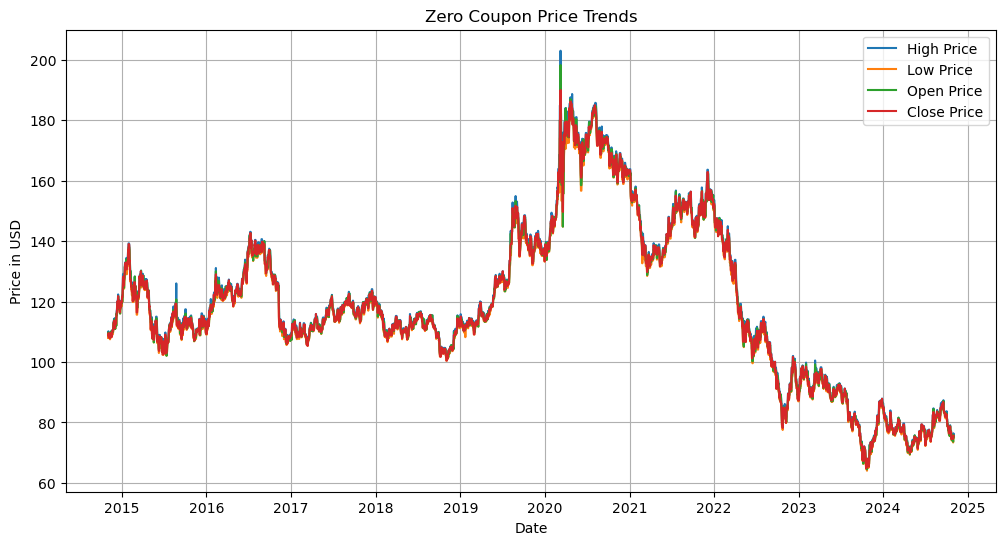

In [67]:
# Observing price trends 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'], label='High Price')
plt.plot(df.index, df['Low'], label='Low Price')
plt.plot(df.index, df['Open'], label='Open Price')
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Zero Coupon Price Trends')
plt.legend()
plt.grid(True)
plt.show()

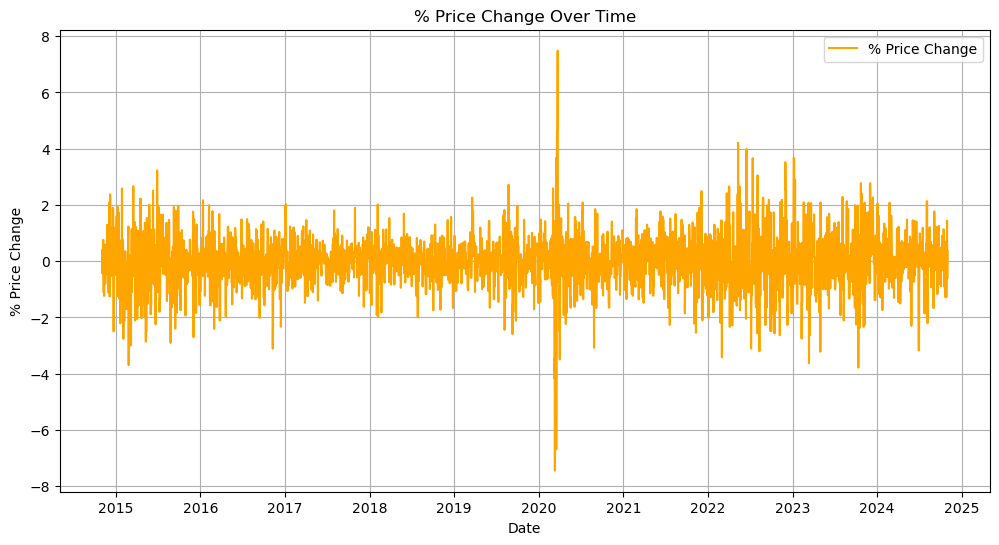

In [68]:
# Plotting % Price Change over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['%PriceChange'], label='% Price Change', color='orange')
plt.xlabel('Date')
plt.ylabel('% Price Change')
plt.title('% Price Change Over Time')
plt.legend()
plt.grid(True)
plt.show()

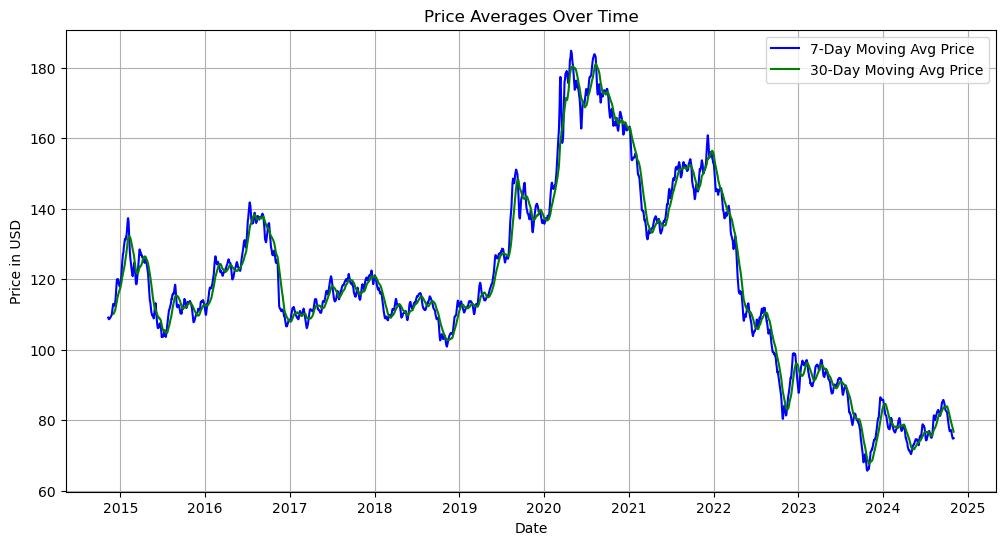

In [69]:
# Plotting Price Averages over Time (7-day and 30-day Moving Averages)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['7DayMovingAvgPrice'], label='7-Day Moving Avg Price', color='blue')
plt.plot(df.index, df['30DayMovingAvgPrice'], label='30-Day Moving Avg Price', color='green')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Price Averages Over Time')
plt.legend()
plt.grid(True)
plt.show()

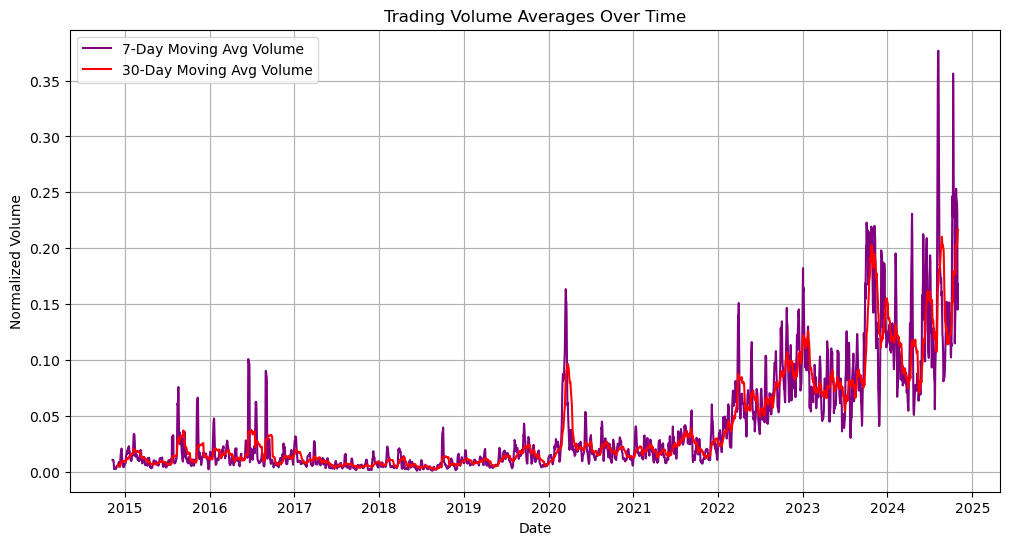

In [70]:
# Plotting Trading Volume Averages over Time (7-day and 30-day Moving Averages)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['7DayMovingAvgVol'], label='7-Day Moving Avg Volume', color='purple')
plt.plot(df.index, df['30DayMovingAvgVol'], label='30-Day Moving Avg Volume', color='red')
plt.xlabel('Date')
plt.ylabel('Normalized Volume')
plt.title('Trading Volume Averages Over Time')
plt.legend()
plt.grid(True)
plt.show()